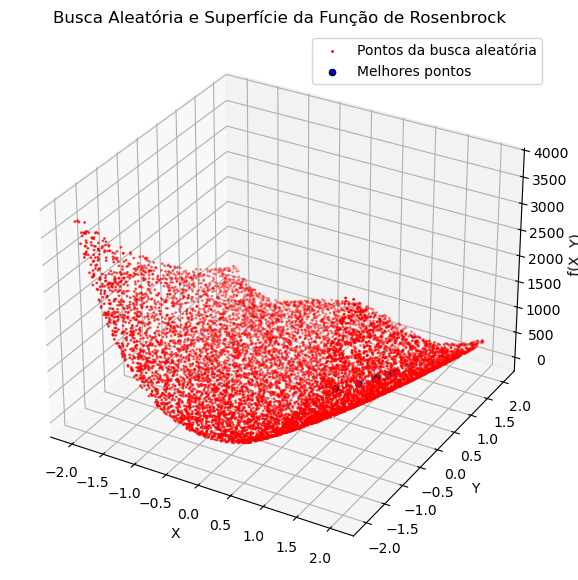

In [4]:
import random
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import time

def funcao_rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

def busca_aleatoria(quantidade_iteracoes, limite_inferior, limite_superior):
    pontos_x = []
    pontos_y = []
    pontos_valor = []

    melhor_x = None
    melhor_y = None
    melhor_valor = np.inf
    pior_x = None
    pior_y = None
    pior_valor = -np.inf

    for _ in range(quantidade_iteracoes):
        x = random.uniform(limite_inferior, limite_superior)
        y = random.uniform(limite_inferior, limite_superior)
        valor = funcao_rosenbrock(x, y)

        pontos_x.append(x)
        pontos_y.append(y)
        pontos_valor.append(valor)

        # Verifica e atualiza o melhor e pior ponto
        if valor < melhor_valor:
            melhor_valor = valor
            melhor_x = x
            melhor_y = y

        if valor > pior_valor:
            pior_valor = valor
            pior_x = x
            pior_y = y

    return melhor_x, melhor_y, melhor_valor, pior_x, pior_y, pior_valor, pontos_x, pontos_y, pontos_valor

# Parâmetros da busca aleatória e intervalo de amostragem
quantidade_iteracoes = 1000
#limite_inferior = -5
limite_inferior = -2.048
#limite_superior = 10
limite_superior = 2.048
execucoes = 10

# Armazenamento dos resultados de todas as execuções
resultados = []
todos_pontos_x = []
todos_pontos_y = []
todos_pontos_valor = []
melhores_pontos_x = []
melhores_pontos_y = []
melhores_pontos_valor = []

# Executa a busca aleatória e armazena dados de cada execução
for i in range(execucoes):
    start_time = time.time()
    melhor_x, melhor_y, melhor_valor, pior_x, pior_y, pior_valor, pontos_x, pontos_y, pontos_valor = busca_aleatoria(
        quantidade_iteracoes, limite_inferior, limite_superior
    )
    exec_time = time.time() - start_time

    todos_pontos_x.extend(pontos_x)
    todos_pontos_y.extend(pontos_y)
    todos_pontos_valor.extend(pontos_valor)
    melhores_pontos_x.append(melhor_x)
    melhores_pontos_y.append(melhor_y)
    melhores_pontos_valor.append(melhor_valor)

# Criação de uma malha para a superfície da função de Rosenbrock
x = np.linspace(limite_inferior, limite_superior, 700)
y = np.linspace(limite_inferior, limite_superior, 700)
x, y = np.meshgrid(x, y)
z = funcao_rosenbrock(x, y)


# Criação do gráfico 3D com a superfície e os pontos da busca aleatória
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plota a superfície da função de Rosenbrock
# surf = ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6, edgecolor='none')

# Plota todos os pontos encontrados nas 10 execuções da busca aleatória
ax.scatter(todos_pontos_x, todos_pontos_y, todos_pontos_valor, color='red', s=1, label='Pontos da busca aleatória')

# Plota os melhores pontos de cada execução em destaque
ax.scatter(melhores_pontos_x, melhores_pontos_y, melhores_pontos_valor, color='blue', s=20, label='Melhores pontos', edgecolors='black')

# Configurações de rótulos, título e barra de cores
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(X, Y)")
ax.set_title("Busca Aleatória e Superfície da Função de Rosenbrock")
ax.legend()
# fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Exibe o gráfico
plt.show()

# Criação do gráfico de superfície 3D com Plotly
fig = go.Figure()

# Superfície da função de Rosenbrock
#fig.add_trace(go.Surface(z=z, x=x, y=y, colorscale='Viridis', opacity=0.7))

# Pontos da busca aleatória
fig.add_trace(go.Scatter3d(
    x=todos_pontos_x, 
    y=todos_pontos_y, 
    z=todos_pontos_valor,
    mode='markers',
    marker=dict(size=1, color='red'),
    name='Pontos da busca aleatória'
))

# Melhores pontos de cada execução
fig.add_trace(go.Scatter3d(
    x=melhores_pontos_x, 
    y=melhores_pontos_y, 
    z=melhores_pontos_valor,
    mode='markers',
    marker=dict(size=2, color='blue', line=dict(width=2, color='black')),
    name='Melhores pontos'
))

# Configurações do layout
fig.update_layout(
    title="Busca Aleatória e Superfície da Função de Rosenbrock",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="f(X, Y)"
    ),
    width=1500,  # Largura do gráfico
    height=1000, # Altura do gráfico
)

# Exibe o gráfico
fig.show()